       batting_avg           ab          hit     home_run    strikeout  \
count  1233.000000  1233.000000  1233.000000  1233.000000  1233.000000   
mean      0.265247   500.163017   133.205191    20.742903   112.680454   
std       0.028637   120.274889    36.731532    10.346179    38.986450   
min       0.168085   154.000000    32.000000     0.000000    12.000000   
25%       0.246801   479.000000   120.000000    13.000000    87.000000   
50%       0.264331   528.000000   138.000000    20.000000   114.000000   
75%       0.283237   575.000000   157.000000    28.000000   140.000000   
max       0.364103   681.000000   217.000000    62.000000   219.000000   

              walk  
count  1233.000000  
mean     50.687753  
std      22.236567  
min       5.000000  
25%      35.000000  
50%      49.000000  
75%      64.000000  
max     145.000000  


/opt/anaconda3/envs/sda/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/sda/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


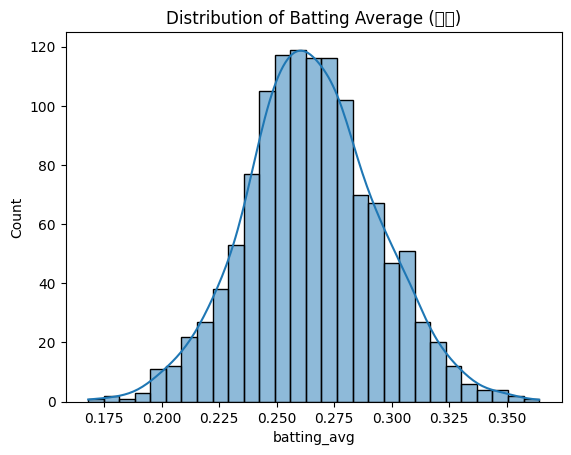

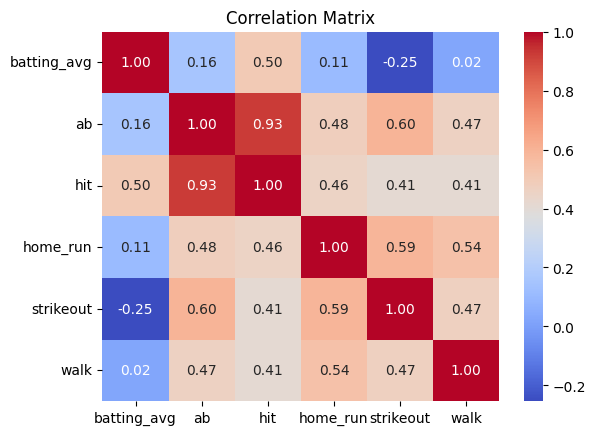

One or both variables are not normally distributed (reject H0).


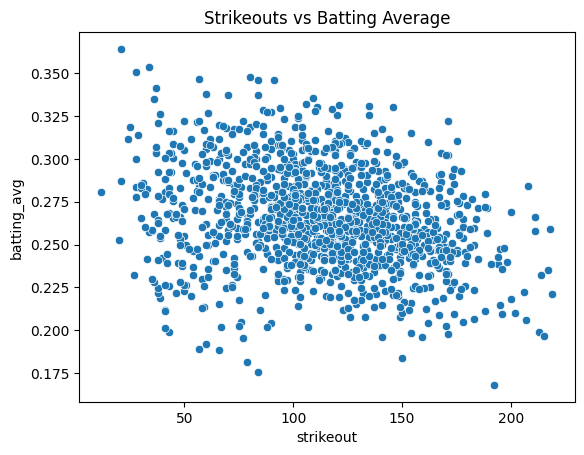

Pearson correlation: -0.25310370513865493, p-value: 1.7829829608229837e-19

Interesting Insights:
1. Batting average shows a correlation with strikeouts, suggesting players with fewer strikeouts may have higher averages.
2. The regression model indicates that home runs, strikeouts, and walks significantly predict batting average.
3. Mean Squared Error for model: 0.000702496751093855

Expected Batting Averages for Players:
           player_name  expected_batting_avg
0         Ortiz, David                 0.294
1       Beltré, Adrian                 0.293
2      Beltrán, Carlos                 0.277
3        Werth, Jayson                 0.258
4     Martinez, Victor                 0.280
...                ...                   ...
1228  Chourio, Jackson                 0.262
1229   Schanuel, Nolan                 0.262
1230   Langford, Wyatt                 0.260
1231      Young, Jacob                 0.250
1232  Merrill, Jackson                 0.271

[1233 rows x 2 columns]


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
from matplotlib import font_manager

df = pd.read_csv('../stats.csv')

# 타율
df['batting_avg'] = df['hit'] / df['ab']

# EDA
print(df[['batting_avg', 'ab', 'hit', 'home_run', 'strikeout', 'walk']].describe())

sns.histplot(df['batting_avg'], kde=True)
plt.title('Distribution of Batting Average (타율)')
plt.show()

# Correlation matrix
corr_matrix = df[['batting_avg', 'ab', 'hit', 'home_run', 'strikeout', 'walk']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Hypothesis Testing
# H0: There is no significant relationship
# Ha: There is a significant relationship


_, p_value_strikeout = stats.shapiro(df['strikeout'])
_, p_value_batting_avg = stats.shapiro(df['batting_avg'])


if p_value_strikeout > 0.05 and p_value_batting_avg > 0.05:
    print('Both Strikeouts and Batting Average are normally distributed (fail to reject H0).')
else:
    print('One or both variables are not normally distributed (reject H0).')

sns.scatterplot(x=df['strikeout'], y=df['batting_avg'])
plt.title('Strikeouts vs Batting Average')
plt.show()

# Pearson correlation test
correlation, p_value = stats.pearsonr(df['strikeout'], df['batting_avg'])
print(f'Pearson correlation: {correlation}, p-value: {p_value}')

# Regression Analysis
X = df[['home_run', 'strikeout', 'walk']]
y = df['batting_avg']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

#Interesting facts
print('\nInteresting Insights:')
print('1. Batting average shows a correlation with strikeouts, suggesting players with fewer strikeouts may have higher averages.')
print('2. The regression model indicates that home runs, strikeouts, and walks significantly predict batting average.')
print(f'3. Mean Squared Error for model: {mse}')

df['expected_batting_avg'] = model.predict(df[['home_run', 'strikeout', 'walk']])
df[['last_name', 'first_name']] = df['last_name, first_name'].str.split(', ', expand=True)
df['player_name'] = df['last_name'] + ', ' + df['first_name']
expected_batting_avg_table = df[['player_name', 'expected_batting_avg']].round({'expected_batting_avg': 3})

print('\nExpected Batting Averages for Players:')
print(expected_batting_avg_table)
